In [2]:
graphics_toolkit('qt')

In [3]:
addpath('../libs/');

# Load Data

In [4]:
data = load('../../data/ex2data1.txt');
X = data(:, [1, 2]); y = data(:, 3);

# Plotting

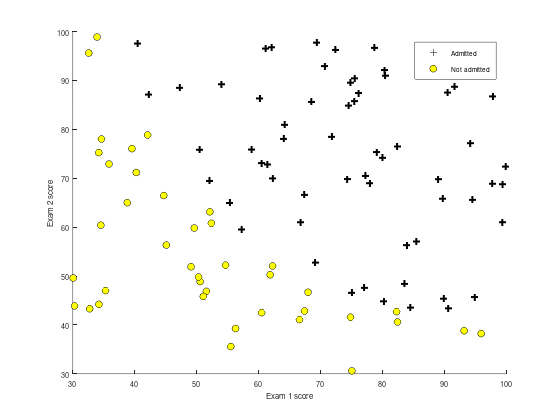

In [5]:
plotData(X, y);
hold on;
xlabel('Exam 1 score');
ylabel('Exam 2 score');
legend('Admitted', 'Not admitted');
hold off;

# Sigmoid function
$$
h_\theta(x) = g(\theta^Tx)
$$
$$
g(z) = \frac{1}{1 + e^{-z}}
$$

# Cost function and Gradiant
$$
J(\theta) = -\frac{1}{m}[\sum^m_{i=1} y^{(i)}\log(h_\theta(x^{(i)})) + (1-y^{(i)})\log(1-h_\theta(x^{(i)}))]
$$

$$
\frac{\partial}{\partial\theta_j}J(\theta) = \frac{1}{m}\sum^m_{i=1}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}
$$

In [6]:
[m, n] = size(X);
X = [ones(m, 1) X];
initial_theta = zeros(n+1, 1);

In [7]:
[cost, grad] = costFunction(initial_theta, X, y);

In [8]:
fprintf('Cost at initial theta(zeros): %f\n', cost);
fprintf('Gradient at initial theta(zeros): \n');
fprintf(' %f \n', grad);

Cost at initial theta(zeros): 0.693147
Gradient at initial theta(zeros): 
 -0.100000 
 -12.009217 
 -11.262842 


# optimizing using fminunc

```octave
% this similar to lambda function in other languages
@(t)(costFunction(t, X, y))
```

In [9]:
options = optimset('GradObj', 'on', 'MaxIter', 400);
[theta, cost, exitflag] = fminunc(@(t)(costFunction(t, X, y)), initial_theta, options);

In [11]:
fprintf('Cost at theta found by fminunc: %f\n', cost);
fprintf('theta: \n');
fprintf('%f \n', theta);

Cost at theta found by fminunc: 0.203498
theta: 
-25.161272 
0.206233 
0.201470 


# Decision boundary, line

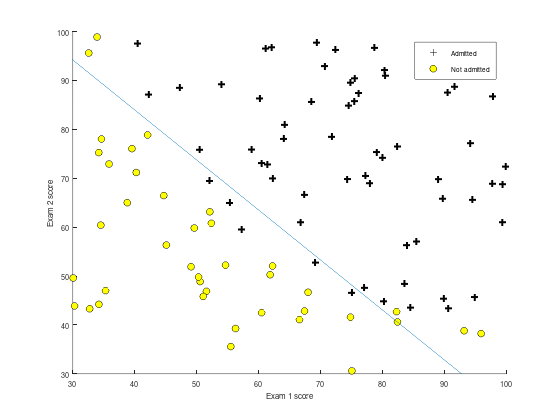

In [12]:
plotDecisionBoundary(theta, X, y);
hold on;
legend('Admitted', 'Not admitted');
axis([30, 100, 30, 100]);
xlabel('Exam 1 score');
ylabel('Exam 2 score');
hold off;

# predict and accuracies

In [13]:
prob = sigmoid([1 45 85] * theta);
fprintf(['for a student wih scores 45 and 85, we predict an admission ' ...
         'probability of %f\n\n'], prob);

p = predict(theta, X);
fprintf('Train Accuracy: %f\n', mean(double(p==y)) * 100);

for a student wih scores 45 and 85, we predict an admission probability of 0.776289

Train Accuracy: 89.000000
